In [314]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA




In [315]:

df = pd.read_csv(r'/Users/mp/Desktop/Assignments/HW1/Cleaned df3.csv')
df.head()


,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-mpg,highway-mpg,price,model,year,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,0,3.0,122,alfa-romero,std,2,convertible,rwd,front,88.6,...,21.0,27.0,13495.0,NaN,2019.4,11.190476,9.370370,low,0,1
1,1,3.0,122,alfa-romero,std,2,convertible,rwd,front,88.6,...,21.0,27.0,16500.0,NaN,2019.4,11.190476,9.370370,low,0,1
2,2,1.0,122,alfa-romero,std,2,hatchback,rwd,front,94.5,...,19.0,26.0,16500.0,NaN,2019.4,12.368421,9.730769,medium,0,1
3,3,2.0,164,audi,std,4,sedan,fwd,front,99.8,...,24.0,30.0,13950.0,NaN,2019.4,9.791667,8.433333,low,0,1
4,4,2.0,164,audi,std,4,sedan,4wd,front,99.4,...,18.0,22.0,17450.0,NaN,2019.4,13.055556,11.500000,low,0,1


In [316]:
df = df.rename(columns={'curb-weight': 'curbweight'})

# Save the dataset
df.to_csv('Cleaned df4.csv', index=False)

In [317]:
features = ["highway-mpg", "engine-size", "horsepower", "curbweight"]

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [318]:
#Now we can fit scikit-learn's PCA estimator and create the principal components. You can see here the first few rows of the transformed dataset.

from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.393907,-0.384444,0.092460,-0.210818
1,0.393907,-0.384444,0.092460,-0.210818
2,1.585530,-0.071266,0.585552,0.151819
3,-0.420542,-0.407168,0.240423,-0.059234
4,1.167859,-0.820930,-0.240536,-0.232007


In [319]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
highway-mpg,-0.486382,0.774645,0.088196,0.394436
engine-size,0.502031,0.625045,-0.062962,-0.594407
horsepower,0.500292,0.034046,0.779311,0.375797
curbweight,0.510984,0.089921,-0.617197,0.591505


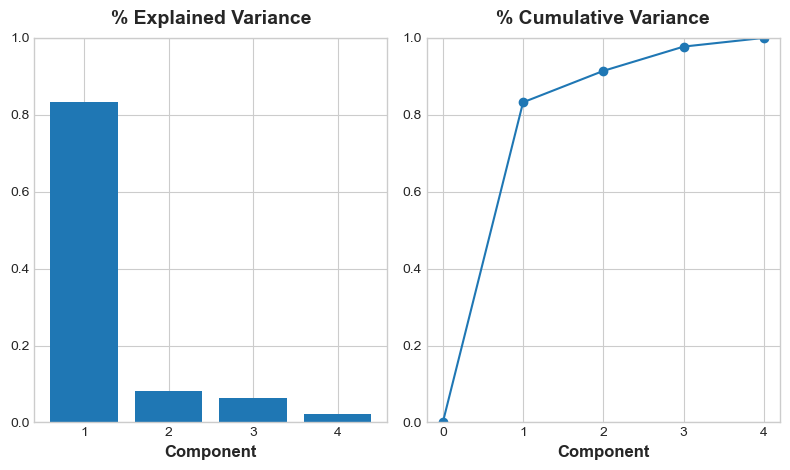

In [320]:
# Look at explained variance
plot_variance(pca);

In [321]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    1.059057
PC2    0.475623
PC3    0.395087
PC4    0.361499
Name: MI Scores, dtype: float64

In [322]:
# Show dataframe sorted by PC3
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["make", "body-style", "horsepower", "curbweight"]
df.loc[idx, cols]

,make,body-style,horsepower,curbweight
129,porsche,hatchback,288.0,3366.0
127,porsche,hardtop,207.0,2756.0
126,porsche,hardtop,207.0,2756.0
128,porsche,convertible,207.0,2800.0
105,nissan,hatchback,200.0,3139.0
...,...,...,...,...
68,mercedes-benz,wagon,123.0,3750.0
70,mercedes-benz,sedan,123.0,3770.0
110,peugot,wagon,95.0,3430.0
114,peugot,wagon,95.0,3485.0


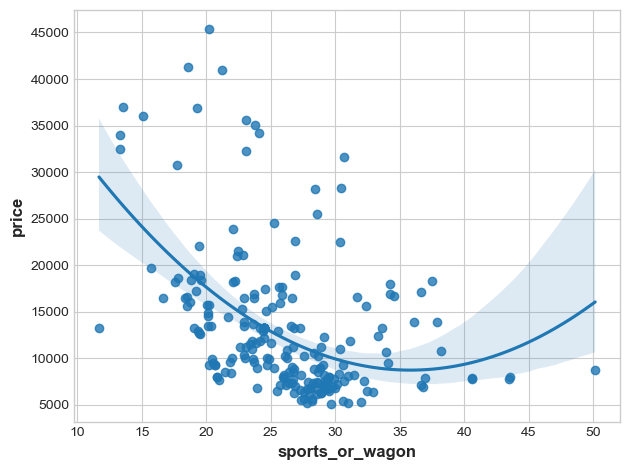

In [323]:
df["sports_or_wagon"] = X.curbweight/ X.horsepower
sns.regplot(x="sports_or_wagon", y='price', data=df, order=2);

In [324]:
X = df.drop(['symboling','year','height','stroke','peak-rpm' ,'model','Unnamed: 0', 'make','horsepower-binned','fuel-type-diesel','fuel-type-gas', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'price'], axis=1)

In [352]:
features = ['sports_or_wagon', 'wheel-base', 'compression-ratio', 'length']

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [353]:
#Now we can fit scikit-learn's PCA estimator and create the principal components. You can see here the first few rows of the transformed dataset.

from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,-1.630595,-0.170014,-0.568977,0.800537
1,-1.630595,-0.170014,-0.568977,0.800537
2,-0.923057,-0.993129,-0.876623,0.102987
3,0.173979,-0.526151,-0.302639,-0.069293
4,-0.017389,-0.616905,0.249236,0.051391


In [354]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
sports_or_wagon,0.124858,0.721385,0.658530,0.174222
wheel-base,0.671613,-0.161988,0.231328,-0.684970
compression-ratio,0.348835,0.603363,-0.715869,-0.042419
length,0.641608,-0.298861,0.018913,0.706161


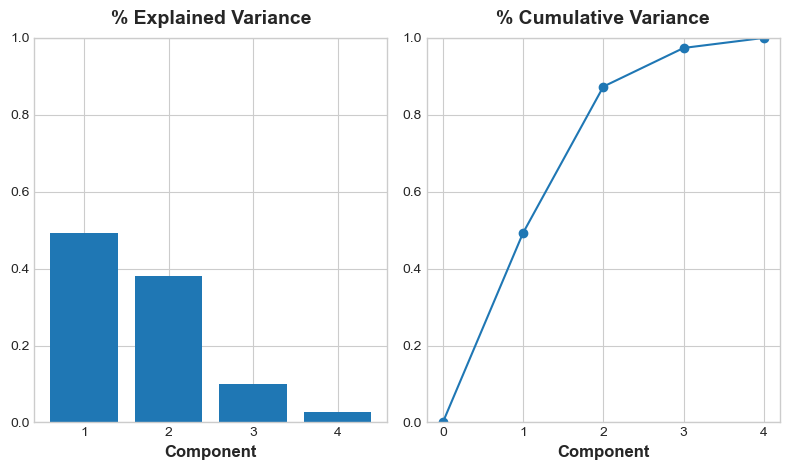

In [355]:
# Look at explained variance
plot_variance(pca);

In [356]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC2    0.835648
PC1    0.459719
PC3    0.397733
PC4    0.284177
Name: MI Scores, dtype: float64

In [357]:
# Show dataframe sorted by PC3
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ['sports_or_wagon', 'wheel-base', 'compression-ratio', 'length']
df.loc[idx, cols]

,sports_or_wagon,wheel-base,compression-ratio,length
155,50.161290,95.7,9.0,0.815473
113,34.578947,114.2,8.4,0.955790
109,33.298969,114.2,8.4,0.955790
111,32.368421,107.9,8.4,0.897165
115,31.701031,107.9,8.4,0.897165
...,...,...,...,...
187,34.102941,97.3,23.0,0.825084
129,11.687500,98.4,10.0,0.844306
128,13.526570,89.5,9.5,0.811629
126,13.314010,89.5,9.5,0.811629


In [358]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
df["sports_or_wagon"] = X.curbweight/ X.horsepower
sns.regplot(x="sports_or_wagon", y='price', data=df, order=2);

In [361]:
# Apply PCA
pca = PCA(n_components=4)
pca.fit(X_scaled)


PCA(n_components=4)

In [362]:
# Look at the explained variance ratio for each component
print(pca.explained_variance_ratio_)

[0.49299955 0.38039871 0.10045338 0.02614836]


In [363]:
# Identify the top two features
top_features = loadings.abs().sum(axis=1).nlargest(4).index.tolist()
print(top_features)


['wheel-base', 'compression-ratio', 'sports_or_wagon', 'length']


In [364]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC2    0.825321
PC1    0.451442
PC3    0.413254
PC4    0.285055
Name: MI Scores, dtype: float64

In [366]:
# Fit a regression model using the top two features
from sklearn.linear_model import LinearRegression

X_top = X[top_features]
model = LinearRegression()
model.fit(X_top, df['price'])
print(X_top)



     wheel-base  compression-ratio  sports_or_wagon    length
0     88.600000           9.000000        22.954955  0.811148
1     88.600000           9.000000        22.954955  0.811148
2     94.500000           9.000000        18.331169  0.822681
3     99.800000          10.000000        22.911765  0.848630
4     99.400000           8.000000        24.556522  0.848630
..          ...                ...              ...       ...
215   98.756585          10.142537        24.512373  0.836373
216   98.756585          10.142537        24.512373  0.836373
217   98.756585          10.142537        24.512373  0.836373
218   98.756585          10.142537        24.512373  0.836373
219   98.756585          10.142537        24.512373  0.836373

[220 rows x 4 columns]


In [367]:
# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_top)
print('R-squared:', r2_score(df['price'], y_pred))
print('MSE:', mean_squared_error(df['price'], y_pred))
print('RMSE:', mean_squared_error(df['price'], y_pred, squared=False))

R-squared: 0.6062408627743845
MSE: 22607453.00011542
RMSE: 4754.729540164763


In [368]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_top)
r2 = r2_score(df['price'], y_pred)

# Calculate the percentage of price predicted
percentage_price_predicted = r2 * 100
print('Percentage of price predicted:', percentage_price_predicted)

Percentage of price predicted: 60.62408627743845
